<a href="https://colab.research.google.com/github/Saidbey/Mr_clean/blob/main/My_mr_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import string


In [2]:
def get_content(url): 
  return BeautifulSoup(requests.get(url).text, "html.parser").select_one("div.vector-body").text

In [3]:
def merge_contents(data):
  res = []
  for i in str(data).split(" "):
    if i.isalpha():
      res.append(i)
  return res

In [4]:
def tokenize(content):
  con = str(content).translate(str.maketrans(' ', ' ', string.punctuation))
  return con

In [5]:
def lower_collection(collection):
  re = str(collection).lower()
  return re

In [6]:
def count_frequency(lower):
  count = {}
  for x in lower:
    count[x] = lower.count(x)
  return count

In [7]:
def print_most_frequent(frequencies, n):
  word_freq = []
  for key, value in frequencies.items():
    word_freq.append((value, key))
    word_freq.sort(reverse=True)
  return word_freq
    
  

In [8]:
stop_words = ['a','able','about','across','after','all','al''most','also','am','among','an','and','any','are','as','at','be','because','been','but','by','can','cannot',
                'could','dear','did','do','does','either','else','ever','every','for','from','get','got','had','has','have','he','her','hers','him','his','how','however',
                'i','if','in','into','is','it','its','just','least','let','like','likely','may','me','might','most','must','my','neither','no','nor','not','of','off','often',
                'on','only','or','other','our','own','rather','said','say','says','she','should','since','so','some','than','that','the','their','them','then','there','these',
                'they','this','tis','to','too','twas','us','wants','was','we','were','what','when','where','which','while','who','whom','why','will','with','would','yet','you','your','uv', 'being']

In [9]:
def remove_stop_words(words, stop_words):
  return [x for x in words if x not in stop_words]               

In [10]:
def find_common(freq):
  df = pd.DataFrame(freq)
  df.set_index(df.columns[0], inplace=True)
  data = df.sort_index(ascending=False).head(25)
  return data

In [11]:
def visualize(find):
  find.columns = ['Top sozlar']
  find.index.name = "Sozlarning soni"
  find = find.reset_index()
  find.index.name = "Egallagan o'rni"
  fig = sns.barplot(data=find, y = 'Top sozlar', x = 'Sozlarning soni')
  

[(106, 'ozone'), (25, 'layer'), (20, 'retrieved'), (18, 'ultraviolet'), (16, 'radiation'), (13, 'climate'), (11, 'solid'), (11, 'depletion'), (10, 'identifiersarticles'), (9, 'skin'), (8, 'stratospheric'), (8, 'national'), (8, 'atmosphere'), (7, 'united'), (7, 'surface'), (7, 'over'), (7, 'levels'), (7, 'environmental'), (6, 'used'), (6, 'stratosphere'), (6, 'oxygen'), (6, 'original'), (6, 'atmospheric'), (6, 'antarctic'), (6, 'air'), (5, 'study'), (5, 'risks'), (5, 'related'), (5, 'percent'), (5, 'parts'), (5, 'out'), (5, 'northern'), (5, 'nations'), (5, 'more'), (5, 'montreal'), (5, 'high'), (5, 'global'), (5, 'circulation'), (5, 'change'), (5, 'cause'), (5, 'between'), (5, 'archived'), (5, 'absorbs'), (5, 'above'), (4, 'very'), (4, 'states'), (4, 'spring'), (4, 'regulation'), (4, 'protection'), (4, 'production'), (4, 'popular'), (4, 'oxide'), (4, 'near'), (4, 'much'), (4, 'metaphors'), (4, 'march'), (4, 'light'), (4, 'less'), (4, 'lay'), (4, 'latitudes'), (4, 'international'), (4, '

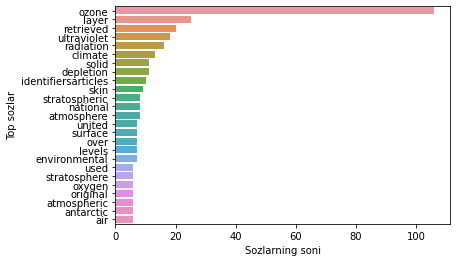

In [12]:
def main():
  url = 'https://en.wikipedia.org/wiki/Ozone_layer'
  data = get_content(url)
  content = merge_contents(data)
  collection = tokenize(content)
  lower = lower_collection(collection)
  filtered_collection = remove_stop_words(lower.split(), stop_words)
  frequencies = count_frequency(filtered_collection)
  freq = print_most_frequent(frequencies, 10)
  find = find_common(freq)
  visualization = visualize(find)
  print(freq)
main()